哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df_A = pd.read_csv("A_lvr_land_A.csv")
df_B = pd.read_csv("B_lvr_land_A.csv")
df_E = pd.read_csv("E_lvr_land_A.csv")
df_F = pd.read_csv("F_lvr_land_A.csv")

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_A.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN


In [4]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
df_A = df_A.drop([0])
df_B = df_B.drop([0])
df_E = df_E.drop([0])
df_F = df_F.drop([0])

In [5]:
df_A.columns

Index(['鄉鎮市區', '交易標的', '土地區段位置建物區段門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)',
       '車位總價元', '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯'],
      dtype='object')

In [6]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
df_A['city'] = "台北市Taipei"
df_B['city'] = "台中市Taichung"
df_E['city'] = "高雄市Kaohsiung"
df_F['city'] = "新北市New_Taipei"

In [7]:
#4. 將以上四份資料運用pd.concat()串接
df_all = pd.concat([df_A,df_B,df_E,df_F])

In [8]:
df_all

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,台北市Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,台北市Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,台北市Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,台北市Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,台北市Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,新北市New_Taipei
19815,三峽區,土地,成福段成福小段331~360地號,762.0,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,新北市New_Taipei
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,新北市New_Taipei
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,新北市New_Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [9]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [10]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df_all = df_all.rename(columns=columns_mapping)
df_all.head()

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,台北市Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,台北市Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,台北市Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,台北市Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,台北市Taipei


In [11]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df_home=df_all[df_all["main_use"]=="住家用"]
df_home=df_all[df_all["use_zoning"]=="住"]
df_home.head()

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,台北市Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,台北市Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,台北市Taipei
7,文山區,房地(土地+建物),臺北市文山區木柵路四段159巷170弄1~30號,30.65,住,NaN,NaN,1090417,土地2建物1車位0,五層,...,NaN,0.0,0,親友、員工或其他特殊關係間之交易。;,RPQNMLQLNHPFFAA08CA,90.78,11.51,12.93,NaN,台北市Taipei
8,文山區,房地(土地+建物),臺北市文山區興隆路三段112巷4弄1~30號,9.84,住,NaN,NaN,1090417,土地1建物1車位0,五層,...,NaN,0.0,0,親友、員工或其他特殊關係間之交易。;,RPSPMLTJOHPFFAA68CA,26.15,0.00,4.01,NaN,台北市Taipei


In [12]:
df_home=df_home[analysis_columns].dropna()

In [13]:
df_home

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
18069,新北市New_Taipei,永和區,見其他登記事項,住,27450000,168.51,84.43,1090731,194003.0,3,2,2
18422,新北市New_Taipei,永和區,見其他登記事項,住,15800000,107.53,47.34,1090806,192334.0,2,2,1
18514,新北市New_Taipei,永和區,見其他登記事項,住,25100000,132.73,84.43,1090628,189106.0,3,2,2
19158,新北市New_Taipei,永和區,見其他登記事項,住,15980000,107.36,47.22,1090724,195306.0,2,2,1


In [14]:
df_home=df_home.astype({"total_price":int,"building_area_square_meter":float,"main_building_area":float,"tx_dt":str,"unit_price":int,"room_number":int,"hall_number":int,"health_number":int})

In [15]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df_home.dtypes

city                           object
towns                          object
main_use                       object
use_zoning                     object
total_price                     int32
building_area_square_meter    float64
main_building_area            float64
tx_dt                          object
unit_price                      int32
room_number                     int32
hall_number                     int32
health_number                   int32
dtype: object

In [16]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引

In [17]:
df_home["tx_dt"]=df_home["tx_dt"].str[:3]+'-'+df_home["tx_dt"].str[3:5]+'-'+df_home["tx_dt"].str[5:]
df_home["tx_dt"]

1        109-04-06
2        109-03-17
5        109-03-28
7        109-04-17
8        109-04-17
           ...    
18069    109-07-31
18422    109-08-06
18514    109-06-28
19158    109-07-24
19782    109-08-11
Name: tx_dt, Length: 14905, dtype: object

In [18]:
df_home["tx_dt_year"]=df_home["tx_dt"].str[:3]
df_home["tx_dt_year"]

1        109
2        109
5        109
7        109
8        109
        ... 
18069    109
18422    109
18514    109
19158    109
19782    109
Name: tx_dt_year, Length: 14905, dtype: object

In [19]:
df_home[(df_home["tx_dt_year"]=='109')&(df_home["room_number"]>=1)&(df_home["room_number"]<=5)&(df_home["hall_number"]>=1)&(df_home["hall_number"]<=2)]

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
1,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,109-04-06,156583,3,2,2,109
2,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,109-03-17,149558,2,1,1,109
5,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,109-03-28,147825,3,2,2,109
7,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,109-04-17,64386,3,1,2,109
8,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,109-04-17,72944,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18069,新北市New_Taipei,永和區,見其他登記事項,住,27450000,168.51,84.43,109-07-31,194003,3,2,2,109
18422,新北市New_Taipei,永和區,見其他登記事項,住,15800000,107.53,47.34,109-08-06,192334,2,2,1,109
18514,新北市New_Taipei,永和區,見其他登記事項,住,25100000,132.73,84.43,109-06-28,189106,3,2,2,109
19158,新北市New_Taipei,永和區,見其他登記事項,住,15980000,107.36,47.22,109-07-24,195306,2,2,1,109


In [20]:
df_home.reset_index()

,index,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,1,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,109-04-06,156583,3,2,2,109
1,2,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,109-03-17,149558,2,1,1,109
2,5,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,109-03-28,147825,3,2,2,109
3,7,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,109-04-17,64386,3,1,2,109
4,8,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,109-04-17,72944,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,18069,新北市New_Taipei,永和區,見其他登記事項,住,27450000,168.51,84.43,109-07-31,194003,3,2,2,109
14901,18422,新北市New_Taipei,永和區,見其他登記事項,住,15800000,107.53,47.34,109-08-06,192334,2,2,1,109
14902,18514,新北市New_Taipei,永和區,見其他登記事項,住,25100000,132.73,84.43,109-06-28,189106,3,2,2,109
14903,19158,新北市New_Taipei,永和區,見其他登記事項,住,15980000,107.36,47.22,109-07-24,195306,2,2,1,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [21]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025


In [22]:
df_home['building_area_square_feet']=df_home['building_area_square_meter']*0.3025
df_home['main_building_area_square_feet']=df_home['main_building_area']*0.3025
df_home['unit_price_square_feet']=df_home['unit_price']/0.3025

In [23]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?

df_home.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,1.490500e+04,14905.000000,14905.000000,1.490500e+04,14905.000000,14905.000000,14905.000000,14905.000000,14905.000000,1.490500e+04
mean,1.306931e+07,144.819997,94.236155,9.332898e+04,2.948272,1.782422,1.999463,43.808049,28.506437,3.085255e+05
std,1.330160e+07,88.153863,64.105951,5.614890e+04,1.666448,0.736089,1.620661,26.666544,19.392050,1.856162e+05
min,0.000000e+00,0.970000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,6.500000e+06,93.300000,57.940000,5.582000e+04,2.000000,2.000000,1.000000,28.223250,17.526850,1.845289e+05
50%,9.950000e+06,128.640000,79.510000,7.785400e+04,3.000000,2.000000,2.000000,38.913600,24.051775,2.573686e+05
75%,1.520000e+07,176.650000,106.200000,1.160090e+05,3.000000,2.000000,2.000000,53.436625,32.125500,3.835008e+05
max,4.948000e+08,4138.750000,1308.570000,1.109189e+06,71.000000,21.000000,71.000000,1251.971875,395.842425,3.666740e+06


In [24]:
# 移除後再用.describe()觀察是否還有奇怪的資料?



# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [25]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數


In [26]:
df_home_taipei=df_home[df_home['city']=='台北市Taipei']
df_home_taipei

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
1,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,109-04-06,156583,3,2,2,109,69.547775,33.550275,517629.752066
2,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,109-03-17,149558,2,1,1,109,11.286275,7.435450,494406.611570
5,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,109-03-28,147825,3,2,2,109,37.407150,29.868850,488677.685950
7,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,109-04-17,64386,3,1,2,109,37.585625,27.460950,212846.280992
8,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,109-04-17,72944,5,2,2,109,9.123400,7.910375,241137.190083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,台北市Taipei,大安區,住家用,住,66500000,269.06,114.05,109-06-15,247157,2,2,4,109,81.390650,34.500125,817047.933884
4015,台北市Taipei,松山區,見其他登記事項,住,21500000,100.66,69.14,109-05-27,213590,3,2,2,109,30.449650,20.914850,706082.644628
4016,台北市Taipei,信義區,見其他登記事項,住,17000000,95.20,83.30,109-06-13,178571,6,0,6,109,28.798000,25.198250,590317.355372
4203,台北市Taipei,信義區,住家用,住,14500000,102.90,91.69,109-05-31,140914,3,2,2,109,31.127250,27.736225,465831.404959


In [27]:
a['total_price'].corr(a['main_building_area'])

NameError: name 'a' is not defined

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

In [28]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_home['city'],y=df_home['unit_price_square_feet'])

<AxesSubplot:xlabel='city', ylabel='unit_price_square_feet'>

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38596 missing from current

<AxesSubplot:xlabel='room_number', ylabel='total_price'>

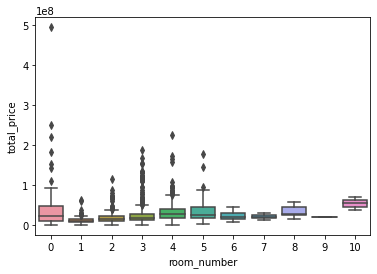

In [29]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
sns.boxplot(x=df_home_taipei['room_number'],y=df_home_taipei['total_price'])

In [36]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()


x=le.fit_transform(df_home_taipei['towns'])

In [49]:
x[555]

10

<AxesSubplot:ylabel='unit_price_square_feet'>

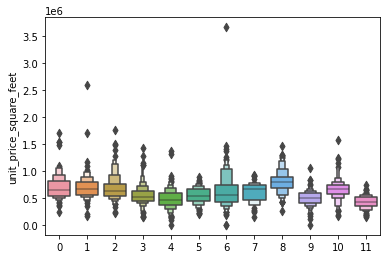

In [38]:
sns.boxenplot(x=x,y=df_home_taipei['unit_price_square_feet'])

In [43]:
le.inverse_transform(x)

array(['文山區', '文山區', '文山區', ..., '信義區', '信義區', '中山區'], dtype=object)

In [44]:
le.classes_

array(['中山區', '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區',
       '文山區', '松山區', '萬華區'], dtype=object)

In [58]:
df_home_taipei['unit_price_square_feet'].groupby(x).median()#.max()

0     642295.867769
1     658477.685950
2     624343.801653
3     519838.016529
4     454586.776860
5     536965.289256
6     547208.264463
7     657923.966942
8     787236.363636
9     491080.991736
10    664604.958678
11    420983.471074
Name: unit_price_square_feet, dtype: float64

In [61]:
le.classes_[8]

'大安區'